# Goals

1. Inflation Rate and Interest Rate in the UK, 
2. Compare the US and UK interest rate and inflation filled in line charts
3. Static plot of the 2023 inflation rates worldwide

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import re

### Importing Data

Data Sources

1. [BoE Interest rate history source](https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp)
2. [Consumer Price Index History Annual rate source](https://www.ons.gov.uk/economy/inflationandpriceindices/timeseries/l55o/mm23)
3. [Gapminder](https://www.gapminder.org/data/)

In [107]:
# Inflation Rates from Gapminder

gapminder_data = pd.read_csv("data/gapminder_data/API_NY.GDP.DEFL.KD.ZG_DS2_en_csv_v2_5994713.csv", header=2)

g7_country_codes = ["USA", "GBR", "CAN", "FRA", "DEU", "ITA", "JPN"]

# Filtering for G7 countries
gapminder_data = gapminder_data.loc[gapminder_data["Country Code"].isin(g7_country_codes)]
gapminder_data.drop(["Unnamed: 67", "1960", "Indicator Code", "Indicator Name", "Country Code"], axis=1, inplace=True)
gapminder_data.set_index("Country Name", inplace=True)

# Transpose the data
gapminder_data = gapminder_data.T

# Create UK only frame
uk_inflation_yearly = gapminder_data["United Kingdom"].to_frame(name="Inflation Rate")
uk_inflation_yearly.reset_index(names="Year", inplace=True)
uk_inflation_yearly.head()


,Year,Inflation Rate
0,1961,3.387796
1,1962,3.369205
2,1963,1.589148
3,1964,3.344812
4,1965,5.594549


In [95]:
# Interest Base Rates

uk_base_rates = pd.read_csv("data/CPIH_ANNUAL_RATE_00:ALL_ITEMS_2015=100.csv", header=7, names=["Year", "Interest Rate"])

# Regex strings to match Year
r1 = "[0-9]{4}$"
r2 = "[0-9]{4}\s[Q]"
r3 = ".{8}"
uk_base_rates_yearly = uk_base_rates.loc[uk_base_rates["Year"].str.match(r1)]
uk_base_rates_quarterly = uk_base_rates.loc[uk_base_rates["Year"].str.match(r2)]
uk_base_rates_monthly = uk_base_rates.loc[uk_base_rates["Year"].str.match(r3)]
uk_base_rates_yearly


,Year,Interest Rate
0,1989,5.7
1,1990,8.0
2,1991,7.5
3,1992,4.6
4,1993,2.6
5,1994,2.2
6,1995,2.7
7,1996,2.9
8,1997,2.2
9,1998,1.8


In [137]:
# Combine Yearly UK interest rates and Inflation
uk_yearly_combined = pd.merge(uk_inflation_yearly, uk_base_rates_yearly, on="Year", how="right")
uk_yearly_combined["Year"] = pd.to_datetime(uk_yearly_combined["Year"], format='%Y')
uk_yearly_combined

,Year,Inflation Rate,Interest Rate
0,1989-01-01,7.935862,5.7
1,1990-01-01,7.886218,8.0
2,1991-01-01,6.419087,7.5
3,1992-01-01,3.320979,4.6
4,1993-01-01,2.733044,2.6
5,1994-01-01,1.393624,2.2
6,1995-01-01,11.650247,2.7
7,1996-01-01,4.820458,2.9
8,1997-01-01,0.154131,2.2
9,1998-01-01,1.550192,1.8


### Exploring G7 Inflation rates

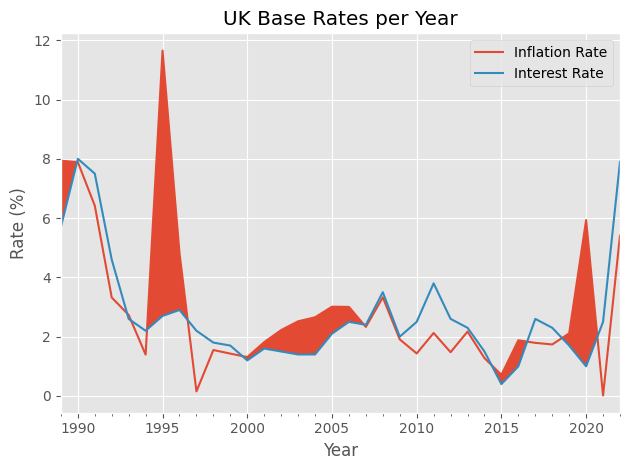

In [140]:
plt.style.use("ggplot")

# Plot both series
uk_yearly_combined.plot(x="Year", title="UK Base Rates per Year", ylabel="Rate (%)")
plt.tight_layout(h_pad=1, w_pad=1)

# Fill between lines
d = uk_yearly_combined["Year"].values
plt.fill_between(d, uk_yearly_combined["Inflation Rate"], uk_yearly_combined["Interest Rate"], where=uk_yearly_combined["Inflation Rate"] >= uk_yearly_combined["Interest Rate"], interpolate=True)

plt.show()
